<a href="https://colab.research.google.com/github/2303A51191/2303A51191/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


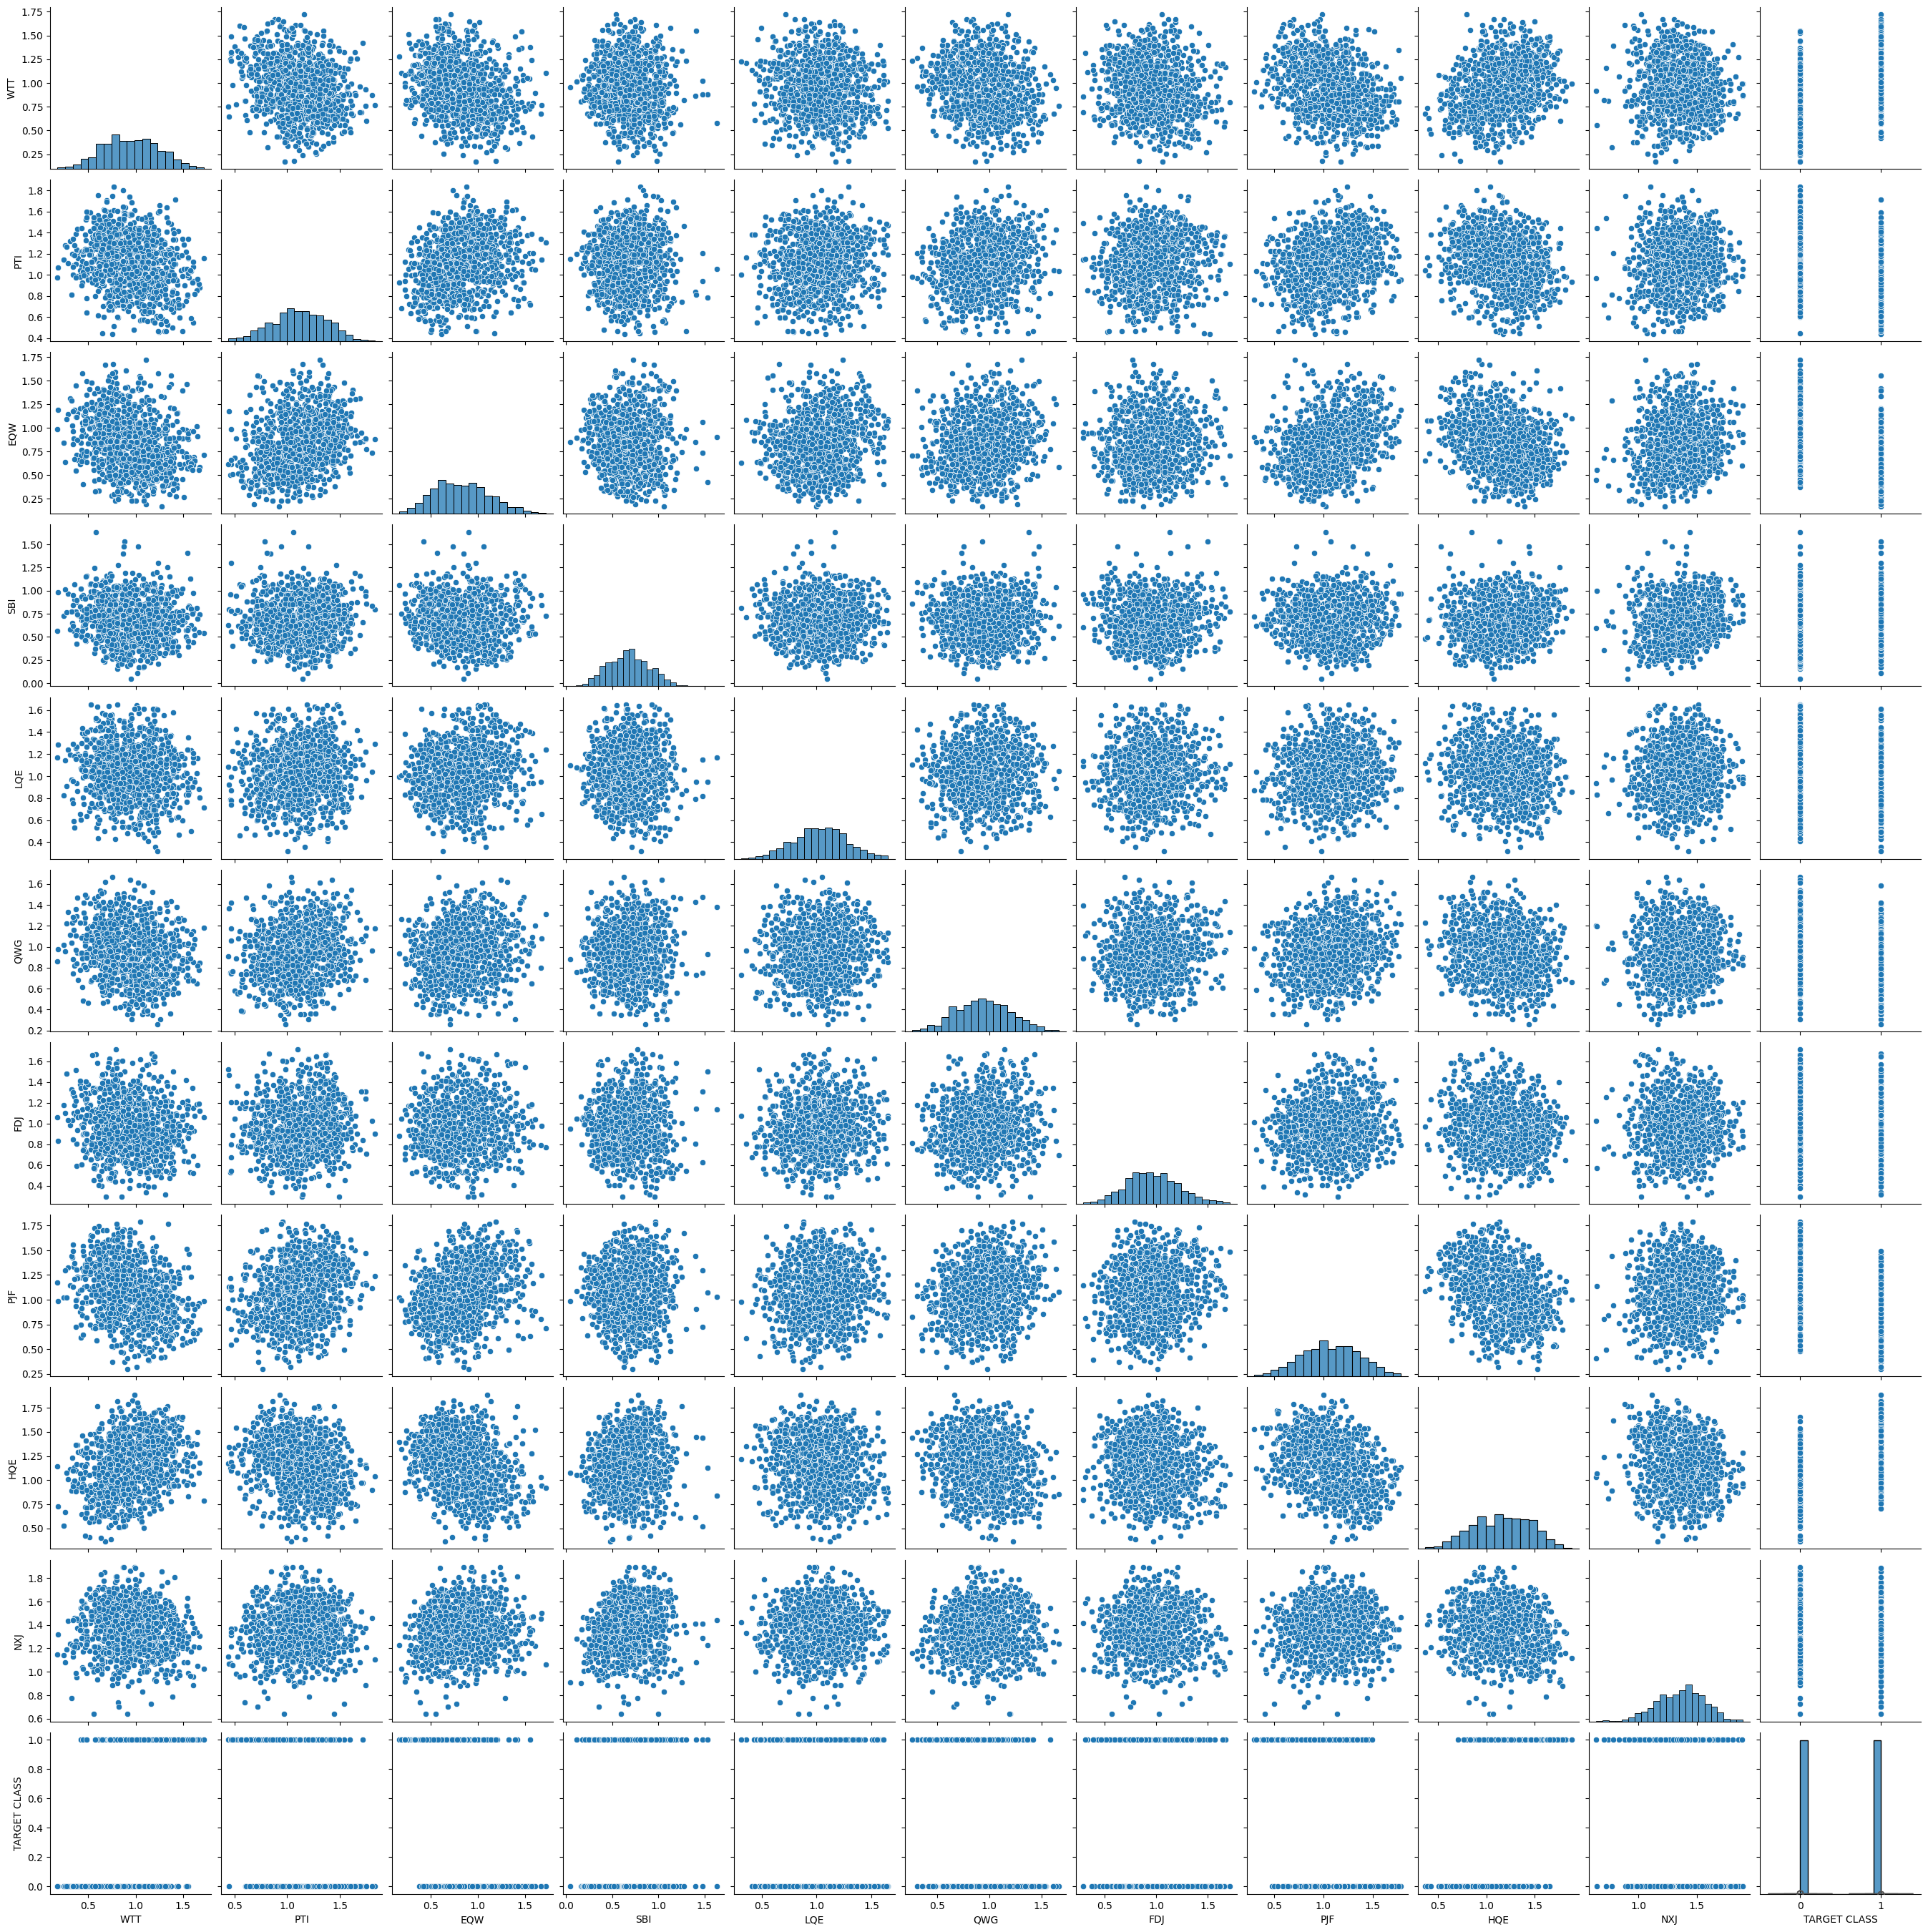

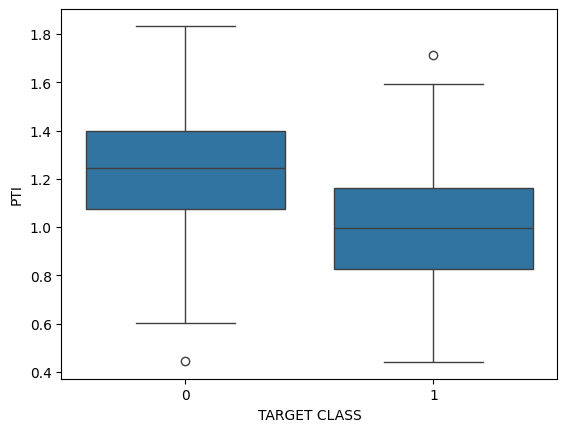

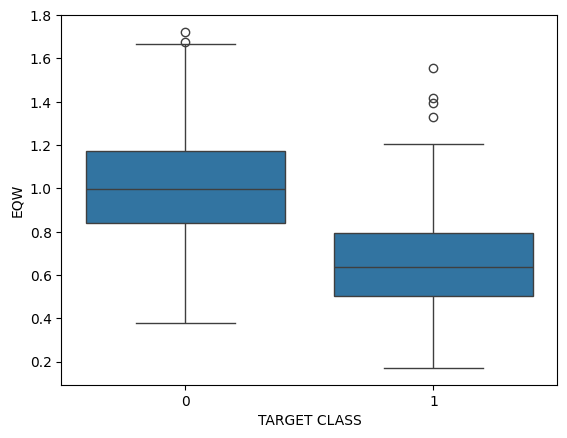

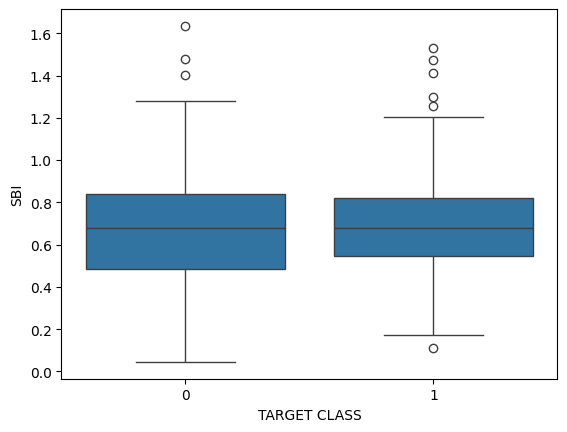

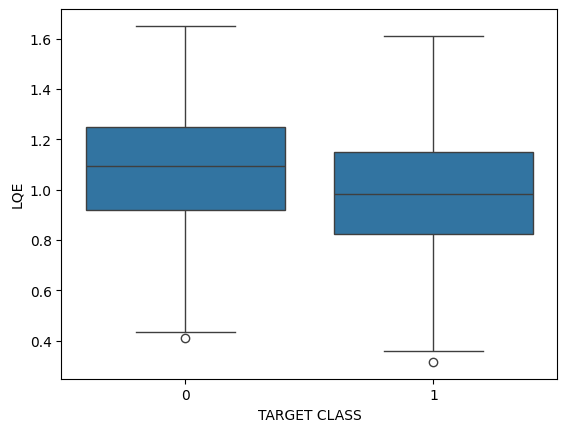

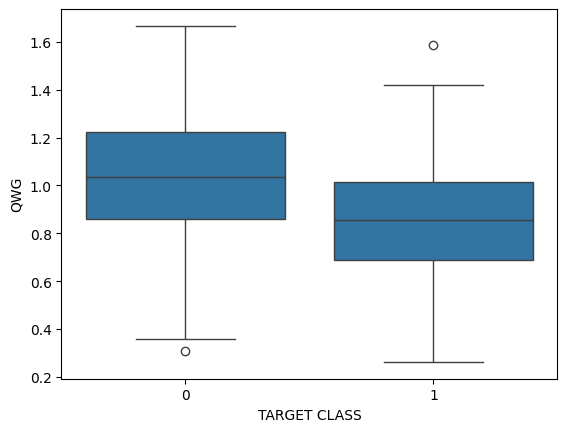

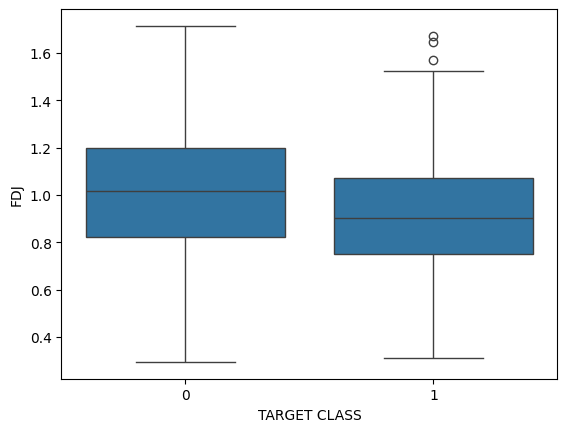

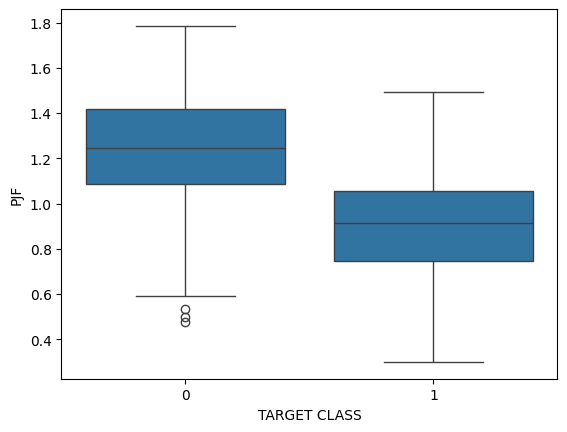

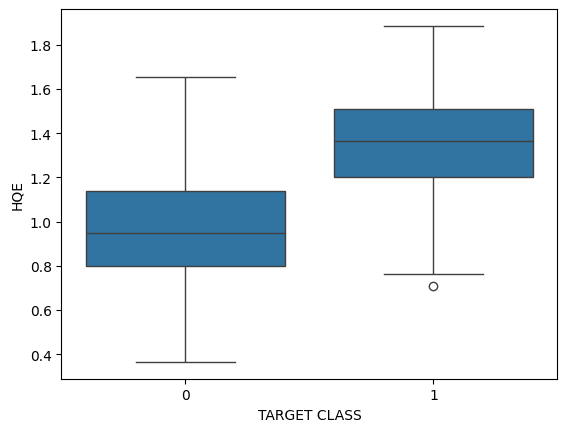

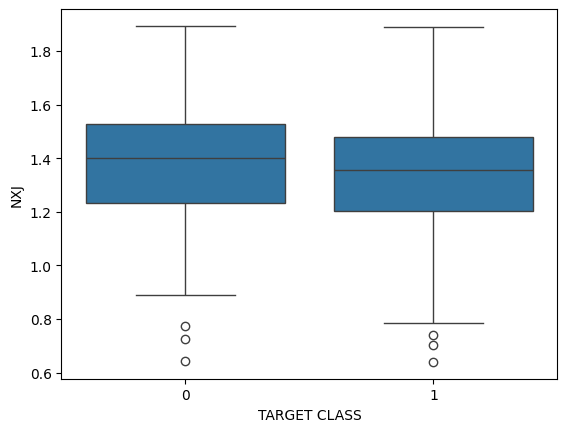

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_table('/content/Classified_Data.txt',sep=',',index_col=0)
df.head()
df.info()
df.describe()
#Check the spread of the features
l=list(df.columns)
l[0:len(l)-2]
sns.pairplot(df)
for i in range(len(l)-1):
  sns.boxplot(x='TARGET CLASS',y=l[i],data=df)
  plt.figure()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()
#train/test split, model fit and prediction
from sklearn.model_selection import train_test_split
X=df_feat
y=df['TARGET CLASS']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




df = pd.read_table("/content/Classified_Data.txt",sep=',',index_col=0)
df.head()




df.info()




df.describe()





l=list(df.columns)
l[0:len(l)-2]



sns.pairplot(df)




Data types of each feature:
| Feature      | Data Type   |
|--------------+-------------|
| WTT          | float64     |
| PTI          | float64     |
| EQW          | float64     |
| SBI          | float64     |
| LQE          | float64     |
| QWG          | float64     |
| FDJ          | float64     |
| PJF          | float64     |
| HQE          | float64     |
| NXJ          | float64     |
| TARGET CLASS | int64       |

Summary of the dataset:
               WTT          PTI          EQW          SBI          LQE          QWG          FDJ          PJF          HQE          NXJ  TARGET CLASS
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000    1000.00000
mean      0.949682     1.114303     0.834127     0.682099     1.032336     0.943534     0.963422     1.071960     1.158251     1.362725       0.50000
std       0.289635     0.257085     0.291554     0.229645     0.243413     0.256121     0.2551

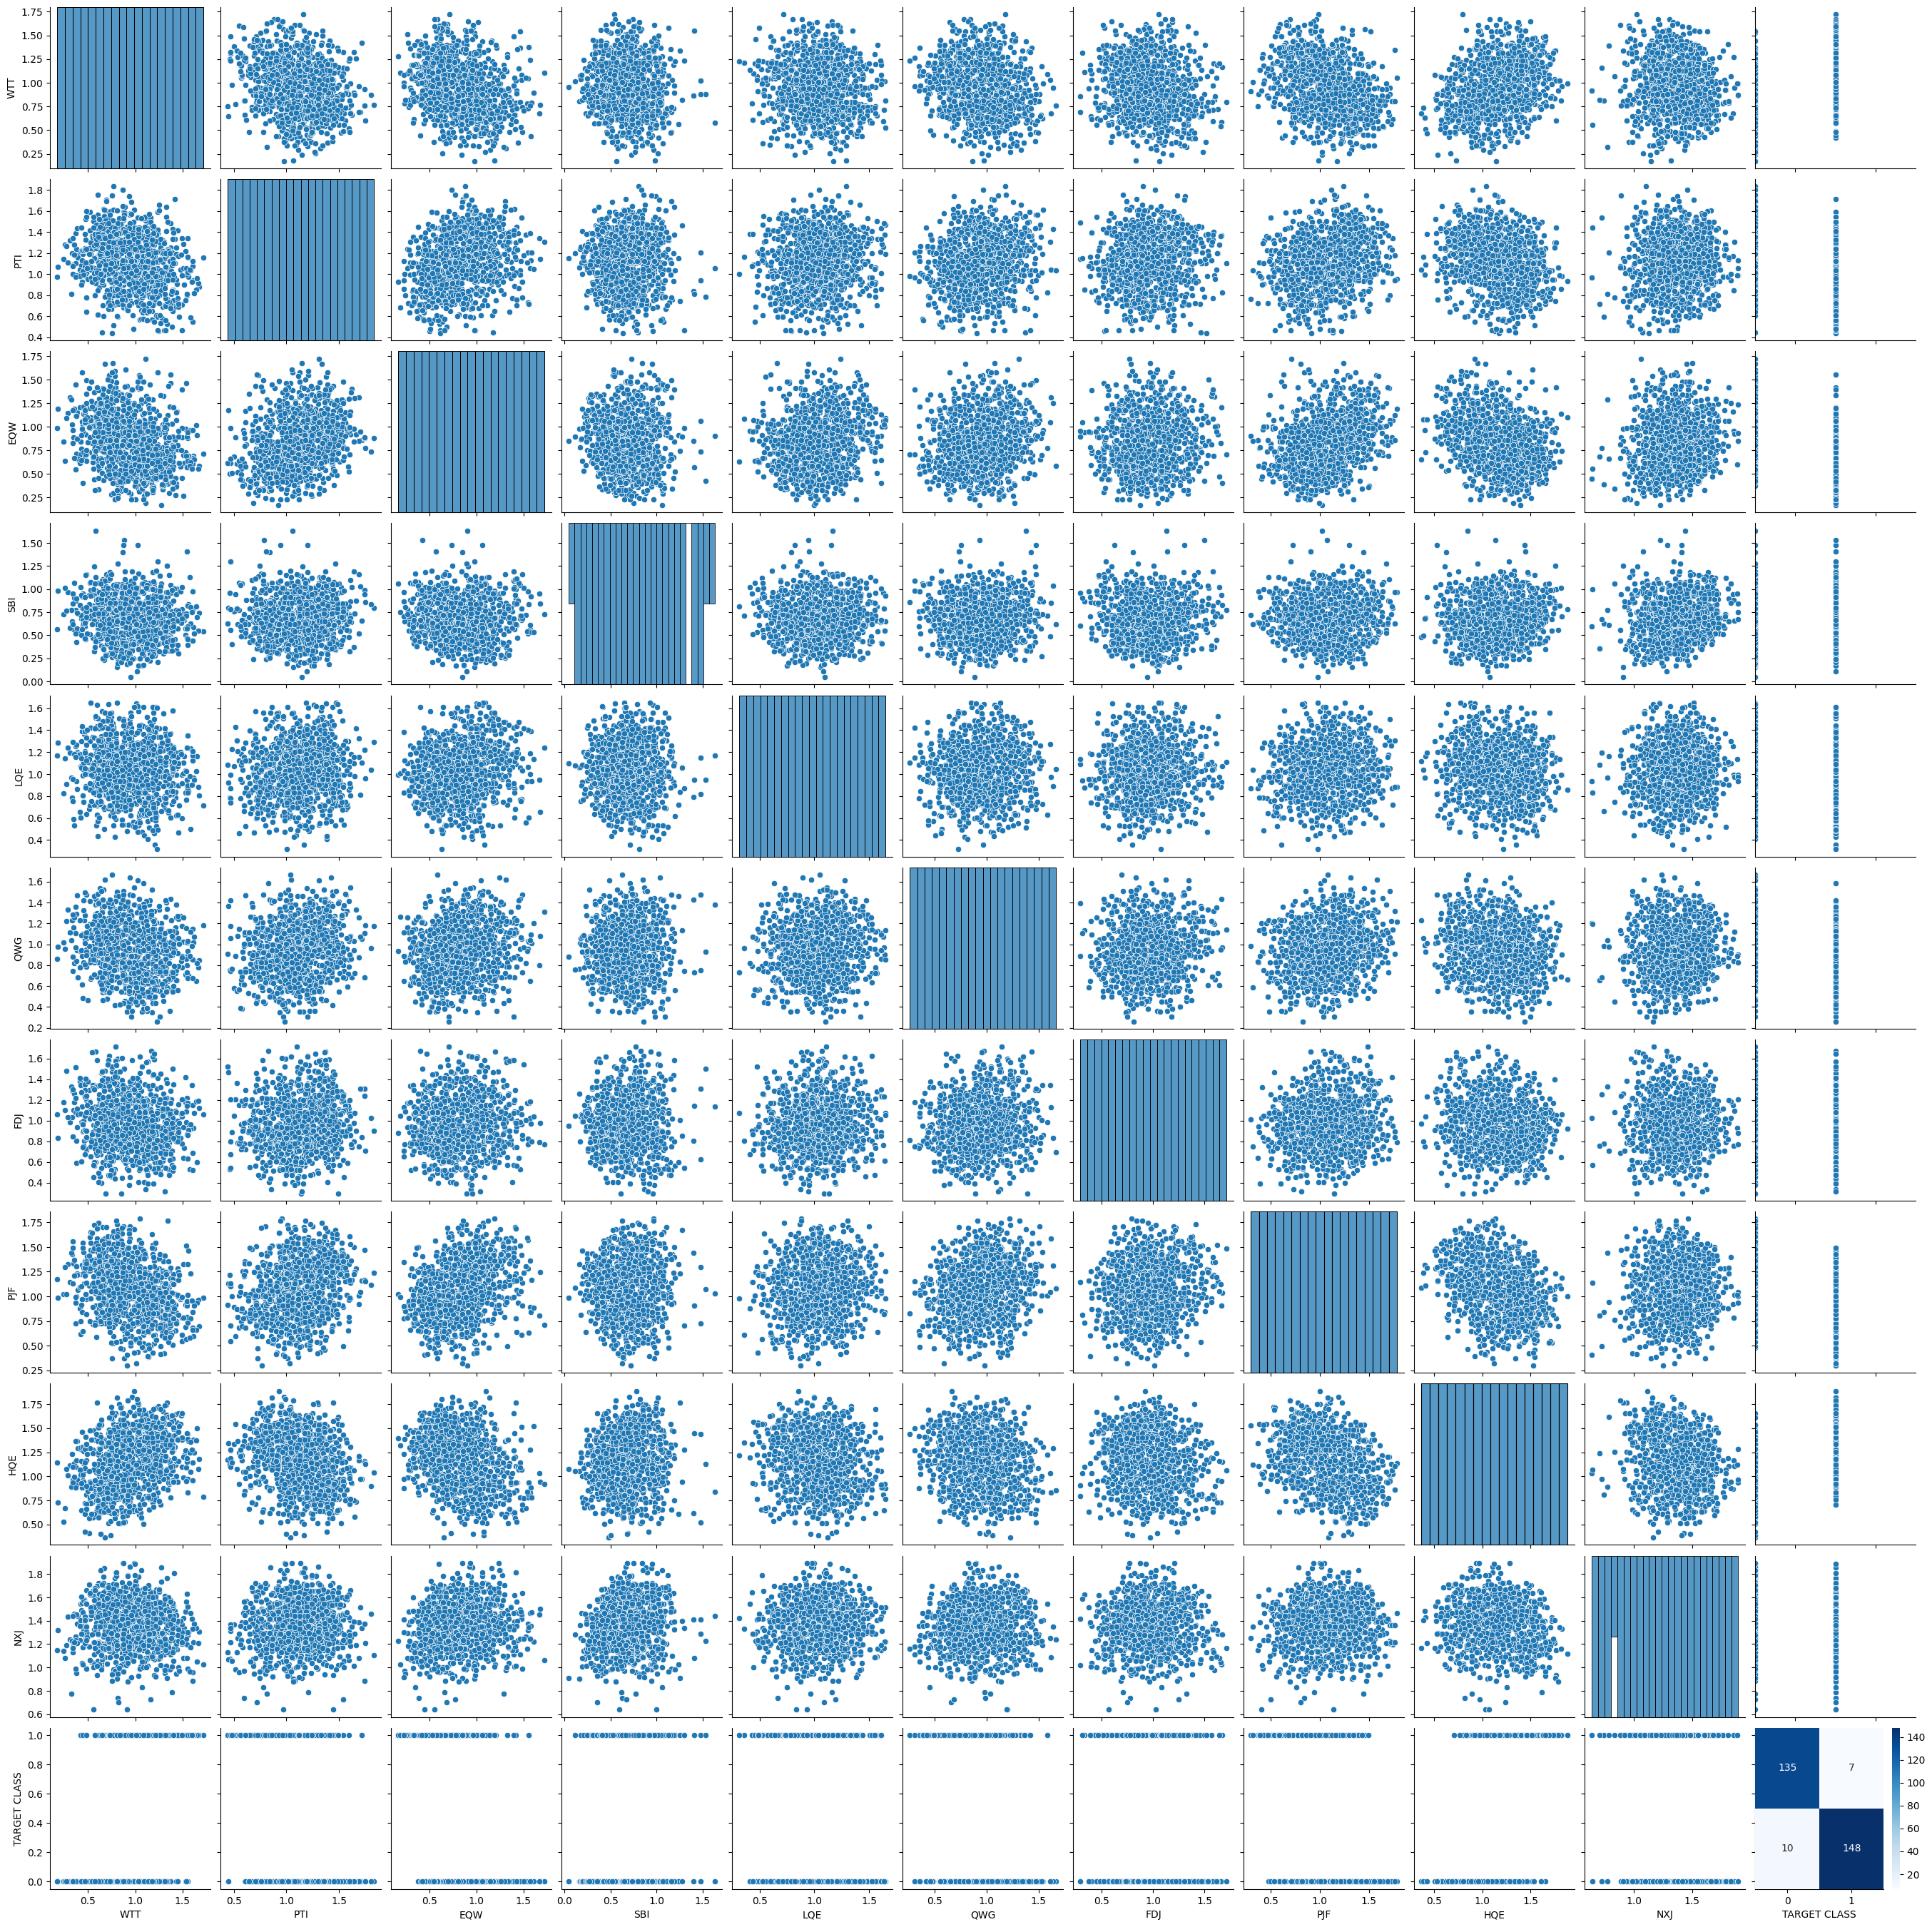

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate
%matplotlib inline

# Part 1: Load and explore the dataset
df = pd.read_csv("/content/Classified_Data.txt", sep=',', index_col=0)

print("Data types of each feature:")
print(tabulate(zip(df.columns, df.dtypes), headers=["Feature", "Data Type"], tablefmt="orgtbl"))

print("\nSummary of the dataset:")
print(df.describe(percentiles=[0.25, 0.5, 0.75, 0.9]).to_string())

print("\nColumn names:")
print(tabulate([df.columns], headers=["Column Names"], tablefmt="orgtbl"))

sns.pairplot(df)

# Part 1: Scale the features
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Part 2: Model training and fitting
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Part 3: Evaluate the classification quality
Y_pred = knn.predict(X_test)

print("\nConfusion matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification report:")
print(classification_report(Y_test, Y_pred))

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB
[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92    

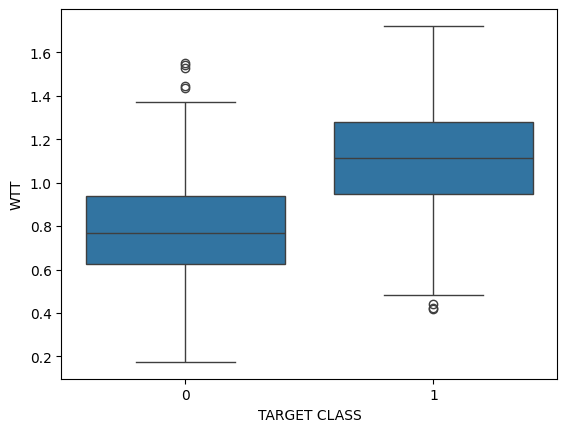

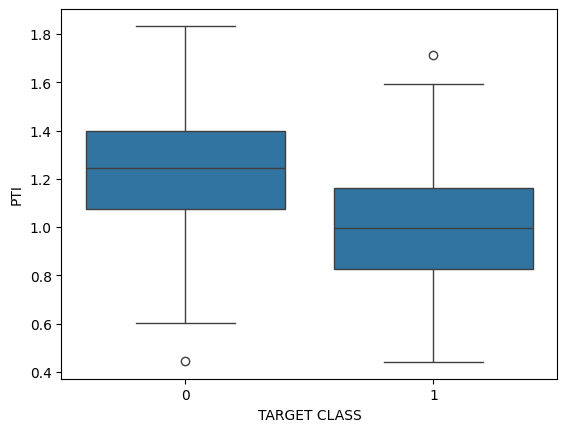

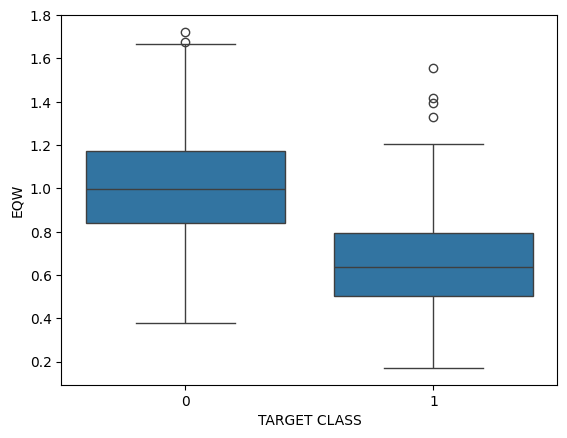

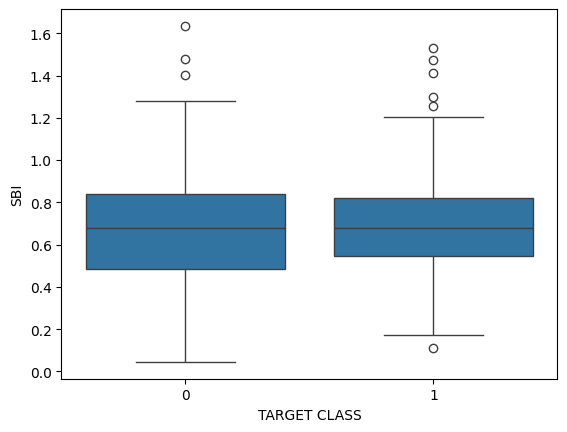

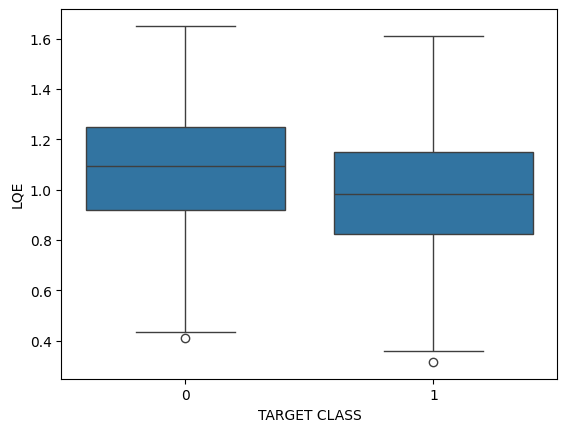

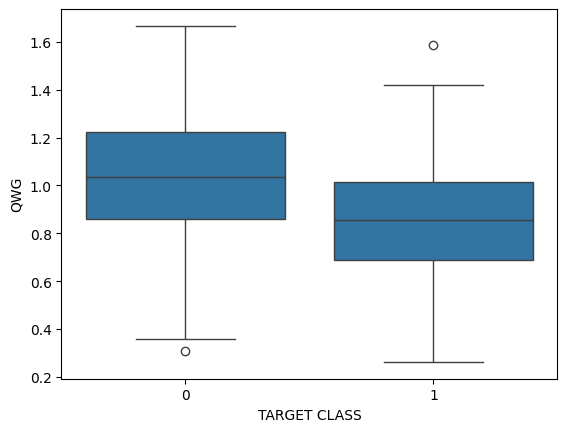

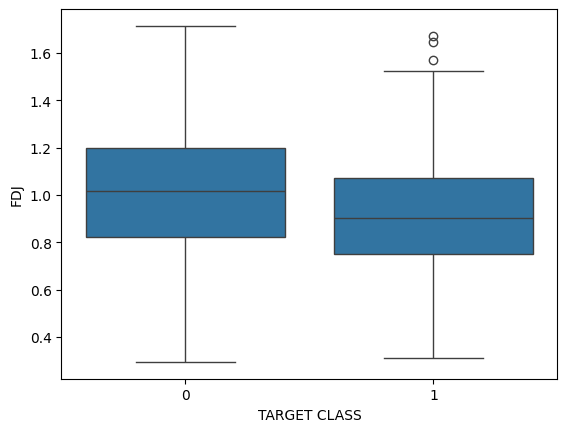

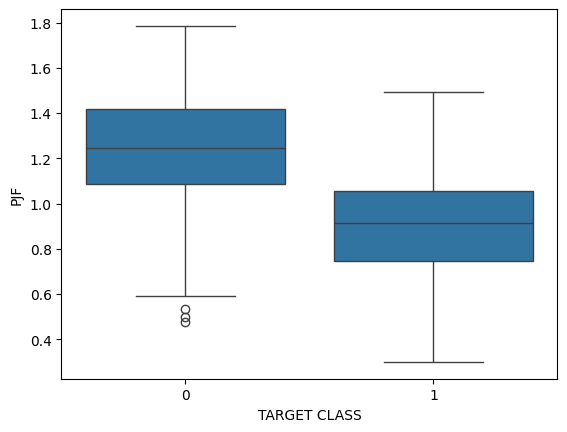

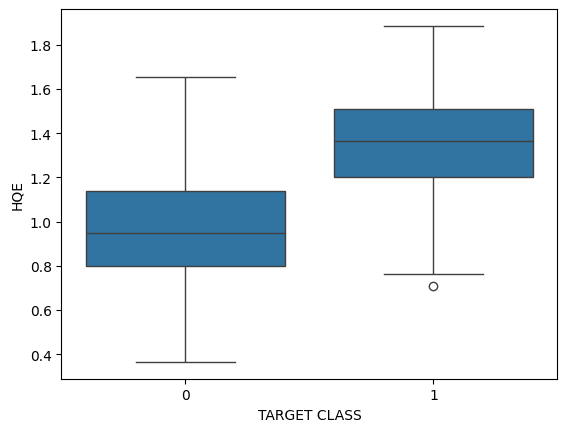

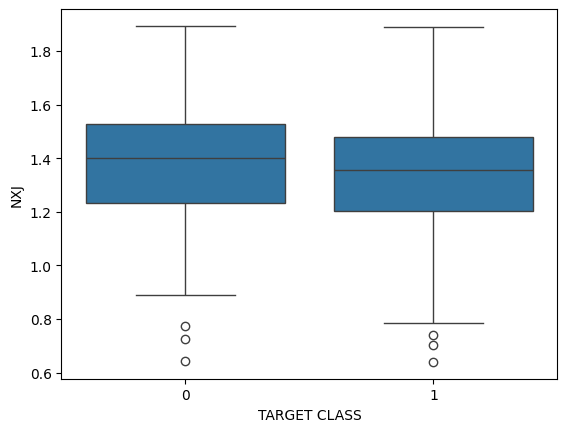

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_table("/content/Classified_Data.txt",sep=",",index_col=0)
df.head()
df.info()
df.describe()

l=list(df.columns)
l[0:len(l)-2]

for i in range(len(l)-1):
  sns.boxplot(x="TARGET CLASS",y=l[i],data=df)
  plt.figure()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("TARGET CLASS",axis=1))
scaled_features = scaler.transform(df.drop("TARGET CLASS",axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_feat,df["TARGET CLASS"],test_size=0.3,random_state=101)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix
conf_mat = confusion_matrix(y_test,pred)
print(conf_mat)
print(classification_report(y_test,pred))
print("Missclassification error rate:",round(np.mean(pred!=y_test),3))
error_rate = []

for i in range(1,60):
  knm = KNeighborsClassifier(n_neighbors=i)
  knm.fit(X_train,y_train)
  pred = knm.predict(X_test)
  error_rate.append(np.mean(pred!=y_test))





# sns.pairplot(df)